# L1 and L2 Regularization

## Learning Obejective

- Delve into the issue of overfitting in statistical models and discover how regularization techniques can address it.
- Understand the fundamentals of regularization, with a focus on Ridge/Lasso regression.
- Learn 3 different loss function to demonstrate the effect of L1 and L2 regularization.
- Investigate the trade-offs in selecting the appropriate regularization parameter (lambda) in Ridge/lasso regression by using Python code.

## 1. Introduction

We will discuss their concepts and application, underline their differences, and provide practical examples of implementing these techniques in Python. <br/>
An essential idea in regression is to fit a line through a series of data points, but this approach can lead to overfitting, especially when the model has too many parameters or attempts to capture the noise within the training data. This results in a model that is overly tailored to the specific dataset and struggles to generalize to new data.

L1 and L2 regularization are techniques within regression that work by constraining or reducing the magnitude of the coefficient estimates, pulling them closer to zero. Essentially, these methods help prevent the model from becoming overly complex or too flexible, thereby reducing the likelihood of overfitting.

## 2. What is L1 and L2 Regularization? 

The formula for the Residual Sum of Squares (RSS) is:

$$
RSS = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

where:
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $n$ is the number of observations.

This formula measures model prediction accuracy for ground-truth values in the training data. If RSS = 0, the model perfectly predicts dependent variables. A score of zero is not always desirable, however, as it can indicate overfitting on the training data, particularly if the training dataset is small. Multicollinearity may be one cause of this.

High coefficient estimates can often be symptomatic of overfitting. If two or more variables share a high, linear correlation, OLS may return erroneously high-value coefficients. When one or more coefficients are too high, the model’s output becomes sensitive to minor alterations in the input data. In other words, the model has overfitted on a specific training set and fails to accurately generalize on new test sets. Such a model is considered unstable. This is where the regularization technique comes in handy.

**Ordinary Least Squares Loss:**

$$
\text{Ordinary Least Squares Loss: } = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**L1 Regularization Loss:**

$$
\text{L1 Regularization Loss: } = \text{Loss}_{\text{OLS}} + \lambda \sum_{i=1}^{n} |w_i|
$$

**L2 Regularization Loss:**

$$
\text{L2 Regularization Loss: } = \text{Loss}_{\text{OLS}} + \frac{\lambda}{2} \sum_{i=1}^{n} w_i^2
$$

Lasso Regression : Performs L1 regularization, i.e., adds penalty equivalent to the **absolute value of the magnitude of coefficients** <br/>
Ridge Regression : Performs L2 regularization, i.e., adds penalty equivalent to the **square of the magnitude of coefficients**

## 3. Loss Function and Gradient Descent

some intuitions why L1 and L2 work by explaining using gradient descent. Gradient descent is simply a method to find the ‘right’ coefficients through iterative updates using the value of the gradient.

### Weight Update Rule with OLS Regression

Predicted value: 

$$\hat{y} = wx+b $$

The OLS loss function is:

$$
\text{Loss}_{\text{OLS}} = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

The weight update rule for OLS regression is:

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \frac{\partial \text{Loss}_{\text{OLS}}}{\partial \mathbf{w}}
$$


### Gradient of L1 Regularization

The L1 regularization term is:

$$
\lambda \sum_{i=1}^{n} |w_i|
$$

The subgradient with respect to each coefficient \( w_i \) is:

$$
\frac{\partial}{\partial w_i} \lambda |w_i| = \lambda \cdot \text{sign}(w_i)
$$

Where:

$$
\text{sign}(w_i) = \begin{cases} 
      -1 & \text{if } w_i < 0 \\
      0 & \text{if } w_i = 0 \\
      1 & \text{if } w_i > 0 
   \end{cases}
$$


The gradient (subgradient) with respect to each coefficient \( w_i \) is:

$$
\frac{\partial \text{Loss}_{\text{Lasso}}}{\partial w_i} = \frac{\partial \text{Loss}_{\text{OLS}}}{\partial w_i} + \lambda \cdot \text{sign}(w_i)
$$

The weight update rule with L1 regularization is:

$$
w_i \leftarrow w_i - \eta \left( \frac{\partial \text{Loss}_{\text{OLS}}}{\partial w_i} + \lambda \cdot \text{sign}(w_i) \right)
$$

This means that:

- If \\( w_j > 0 \\), it gets decreased by \\( \lambda \\) at each step.
- If \\( w_j < 0 \\), it gets increased by \\( \lambda \\) at each step.
- If \\( w_j = 0 \\), it stays at 0.

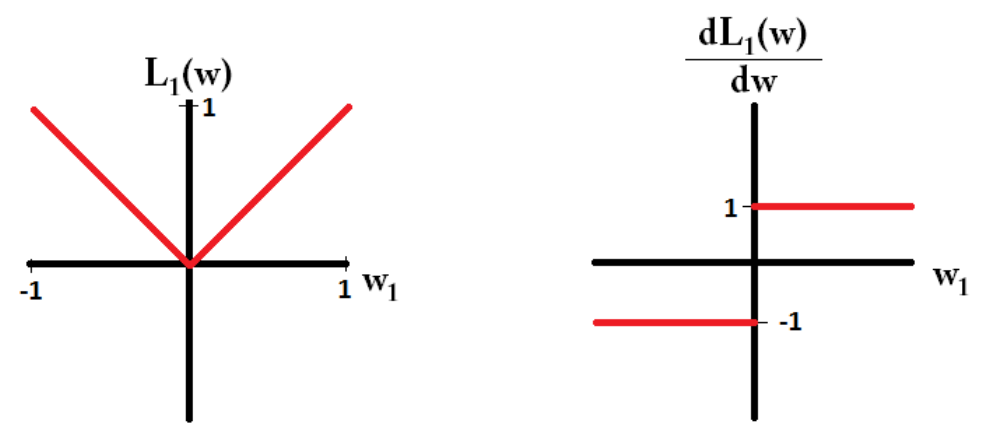

### Gradient of L2 Regularization

The L2 regularization term is:

$$
\frac{\lambda}{2} \sum_{i=1}^{n} w_i^2
$$

The gradient with respect to each coefficient \( w_i \) is:

$$
\frac{\partial \text{Loss}}{\partial w_i} = \lambda w_i
$$

### Weight Update Rule with L2 Regularization

The weight update rule in gradient descent with L2 regularization is:

$$
w_i \leftarrow w_i - \eta \left( \frac{\partial \text{Loss}_{\text{OLS}}}{\partial w_i} + \lambda w_i \right)
$$

Here, $ \eta $ is the learning rate. The term $ \lambda w_i $ shrinks the coefficient $ w_i $ by a factor proportional to its value. The larger the coefficient, the stronger the shrinkage, but the gradient never reaches zero unless $ w_i $ is exactly zero to start with. Therefore, L2 regularization tends to reduce the coefficients towards zero but not exactly zero.


**Why L1 Regularization Can Set Coefficients Exactly to Zero:**

Because L1 regularization adds a constant amount ($\lambda$) to the gradient (depending on the sign of $w_i$), it can eventually shrink small coefficients completely to zero. If the gradient from the RSS is smaller than $\lambda$, the update will push $w_i$ to zero. Once $w_i$ becomes zero, it tends to stay zero because the gradient from the penalty term at zero is constant. <br/>

**Why L2 Regulairzation Doesn't Set Coefficients to Exactly Zero:**

In contrast, L2 regularization shrinks coefficients proportionally to their size (due to the $\lambda w_i$ term). This proportional shrinkage gets smaller as $w_i$ approaches zero, but it never actually forces $w_i$ to become zero unless the gradient from the RSS term drives it there. The shrinkage slows down as $w_i$ gets smaller, leading to coefficients that are small but not exactly zero.


## 4. Geometric interpretation

Contours: the mean squared error loss function (the squared distance between the true and predicted values) for two weight coefficient $\beta$1 and $\beta$2 <br/>
**Goal:** find the combinations of  $\beta$1 and $\beta$2 that minimize the loss function and **$\hat{\beta}$** is Minimze loss point

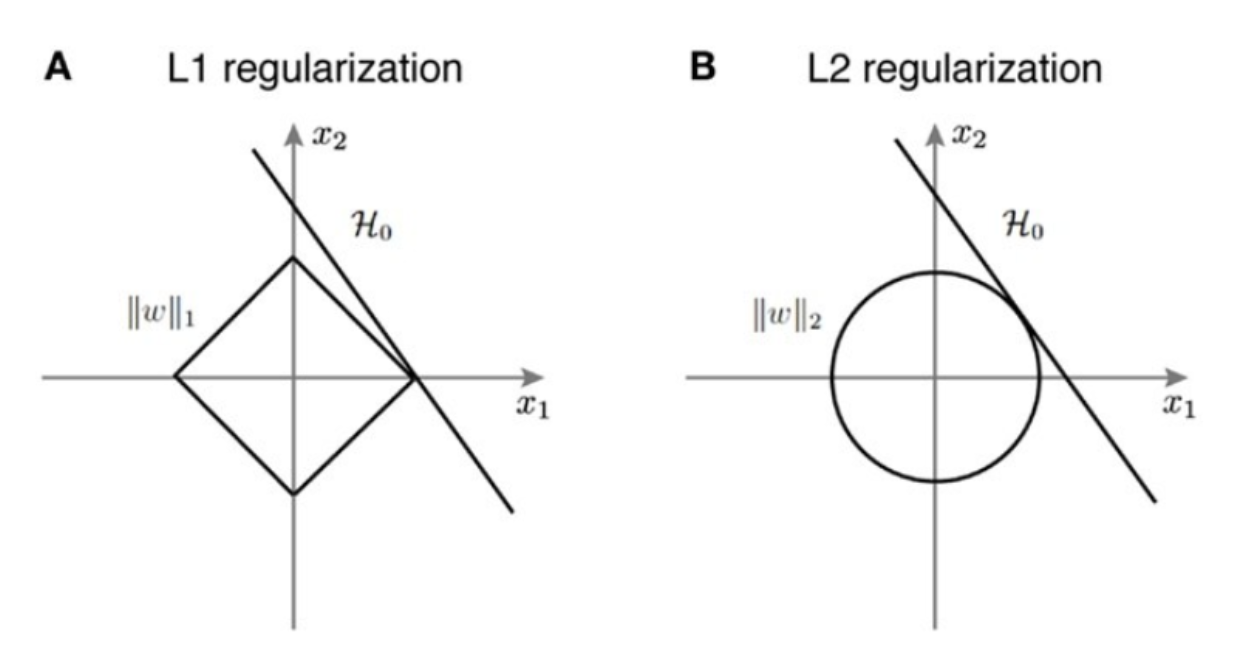

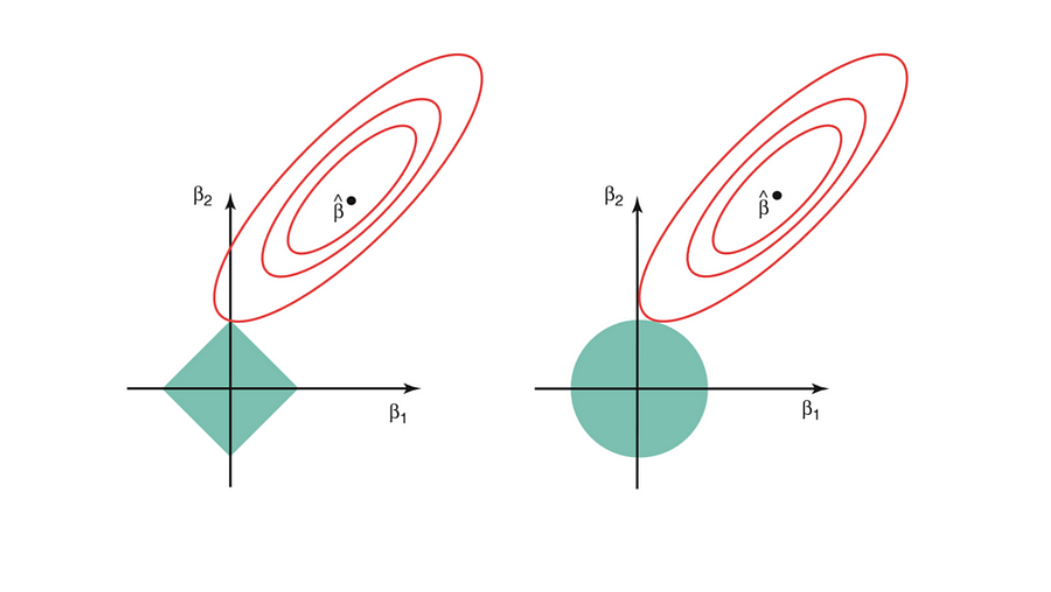

### Ridge Regression Constraint

The constraint for Ridge regression is:

$$
\beta_1^2 + \beta_2^2 \leq s
$$

### Lasso Regression Constraint

The constraint for Lasso regression is:

$$
|\beta_1| + |\beta_2| \leq s
$$

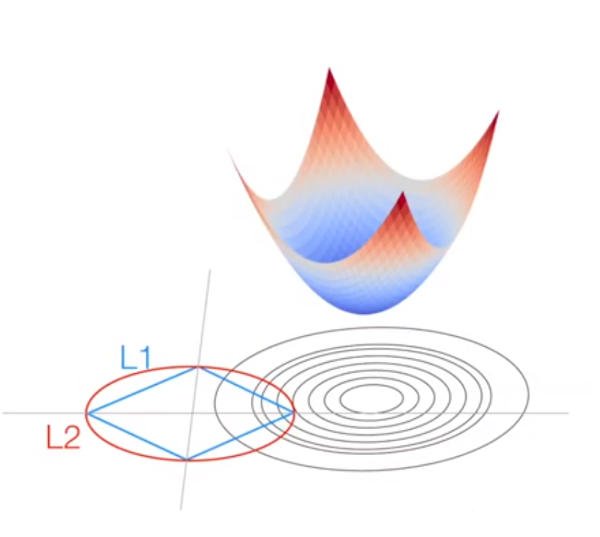

## 5. Key differences between ridge vs lasso and Typical Uses cases

|characteristic|Ridge Regression|Lasso Rregression|
|------|----|----|
|Penalty Type|Ridge regression applies an L2 penalty, which involves adding the squared values of the coefficients, scaled by a tuning parameter (lambda)|Lasso regression uses an L1 penalty, which sums the absolute values of the coefficients, scaled by lambda|
|Coefficient Impact|The L2 penalty in ridge regression discourages excessively large coefficients by shrinking them towards zero, although they never reach exactly zero. This reduces the influence of less significant features.|The L1 penalty in lasso regression can shrink some coefficients to exactly zero when lambda is sufficiently large, performing feature selection and creating a model with fewer variables.|
|Feature Selection|Ridge regression includes all features in the model but reduces the influence of less significant ones by shrinking their coefficients|Lasso regression can eliminate some coefficients entirely, leading to a model that includes only the most relevant features, enhancing model interpretability.|
|Use Case|Ridge regression is useful when the goal is to minimize the impact of less important features while keeping all variables in the model. It's useful when you suspect that many features contribute to the outcome, even if weakly|Lasso regression is preferable for feature selection, producing a simpler and more interpretable model with a reduced number of variables
|Sparsity|Ridge regression does not yield sparse models since all coefficients remain non-zero|Lasso regression can produce sparse models by setting some coefficients to exactly zero|
|Sensitivity|Generally more robust and less influenced by outliers compared to lasso regression|More sensitive to outliers due to the absolute value in the penalty term|스트3|

## 6. Implementing Ridge/Lass regression 

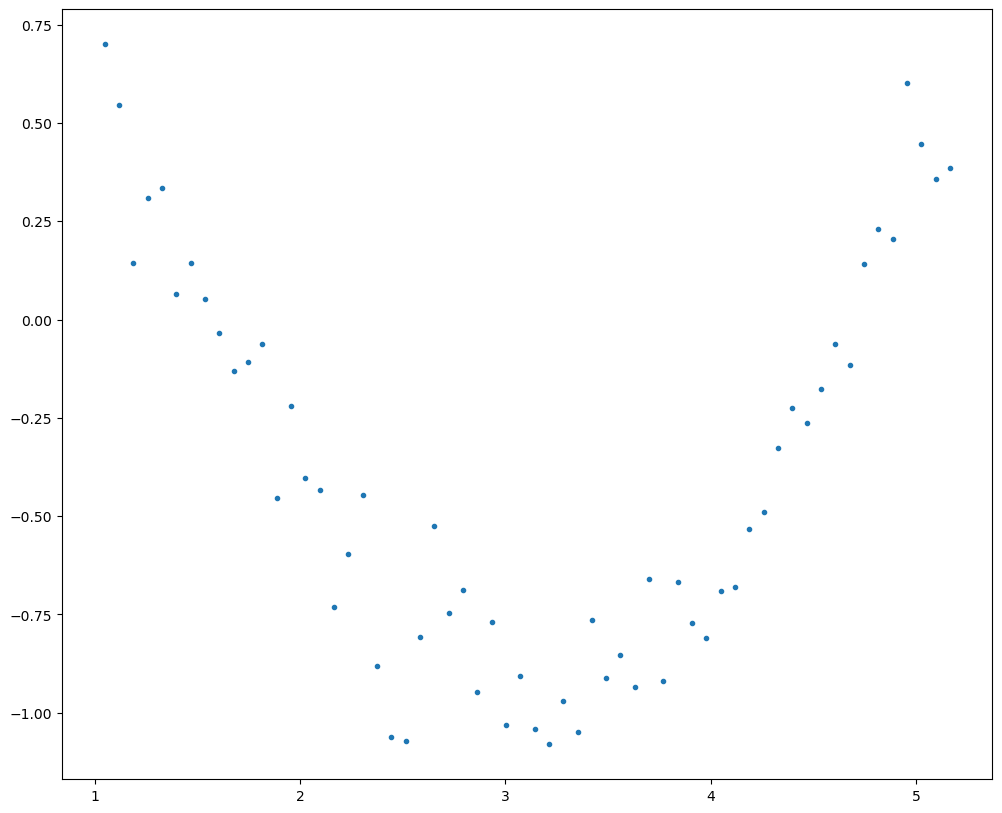

In [6]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

# Create x values
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  # Setting seed for reproducibility

# Use cosine function instead of sine
y = np.cos(x) + np.random.normal(0,0.15,len(x))

# Create a dataframe
data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])

# Plot the data
plt.plot(data['x'], data['y'], '.')
plt.show()

In [8]:
for i in range(2,16):  
    colname = 'x_%d'%i      
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  0.699738  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  0.545663  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.142797  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.307759  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  0.335122  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

def linear_regression(data, power, models_to_plot):
    predictors = ['x']
    if power >= 2:
        predictors.extend(['x_%d' % i for i in range(2, power + 1)])

    linreg = make_pipeline(StandardScaler(), LinearRegression())
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])

    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for power: %d' % power)

    rss = sum((y_pred - data['y'])**2)
    intercept = linreg.named_steps['linearregression'].intercept_
    coef = linreg.named_steps['linearregression'].coef_
    ret = [rss, intercept]
    ret.extend(coef)
    return ret

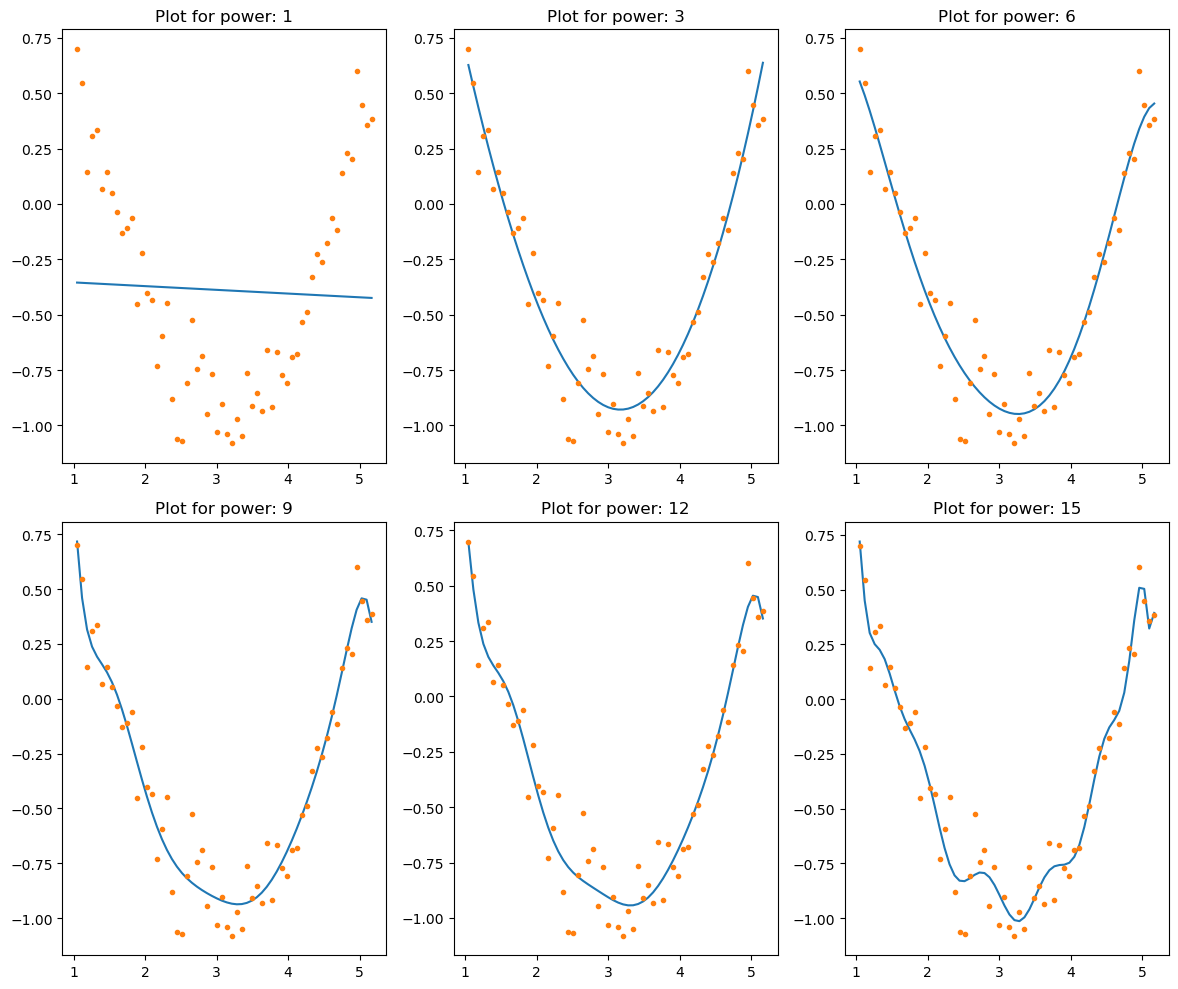

In [12]:
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['model_pow_%d' % i for i in range(1, 16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1: 231, 3: 232, 6: 233, 9: 234, 12: 235, 15: 236}

for i in range(1, 16):
    result = linear_regression(data, power=i, models_to_plot=models_to_plot)
    coef_matrix_simple.iloc[i-1, 0:len(result)] = result

In [14]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,15,-0.39,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,1.1,-0.39,-2.8,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-0.39,-2.4,2,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1,-0.39,0.085,-6.8,11,-4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,-0.39,-5.4,20,-40,39,-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-0.39,11,-80,2.2e+02,-3.1e+02,2.2e+02,-62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,-0.39,-69,5.3e+02,-1.8e+03,3.4e+03,-3.6e+03,2e+03,-4.8e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,-0.39,-1.7e+02,1.4e+03,-5.3e+03,1.2e+04,-1.5e+04,1.2e+04,-5.2e+03,9.5e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,-0.39,-7.4e+02,7.3e+03,-3.4e+04,9.3e+04,-1.6e+05,1.8e+05,-1.3e+05,5.2e+04,-9.2e+03,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,-0.39,-5.9e+02,5.5e+03,-2.4e+04,5.9e+04,-8.8e+04,7.3e+04,-2e+04,-1.7e+04,1.6e+04,-4.1e+03,NaN,NaN,NaN,NaN,NaN


This clearly aligns with our initial understanding. As the model complexity increases, the models tend to fit even smaller deviations in the training data set. <br/>
It is clearly evident that the size of coefficients increases exponentially with an increase in model complexity. I hope this gives some intuition into why putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.

In [16]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    ridgereg = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)
    
    rss = sum((y_pred - data['y'])**2)
    intercept = ridgereg.named_steps['ridge'].intercept_
    coef = ridgereg.named_steps['ridge'].coef_
    ret = [rss, intercept]
    ret.extend(coef)
    return ret

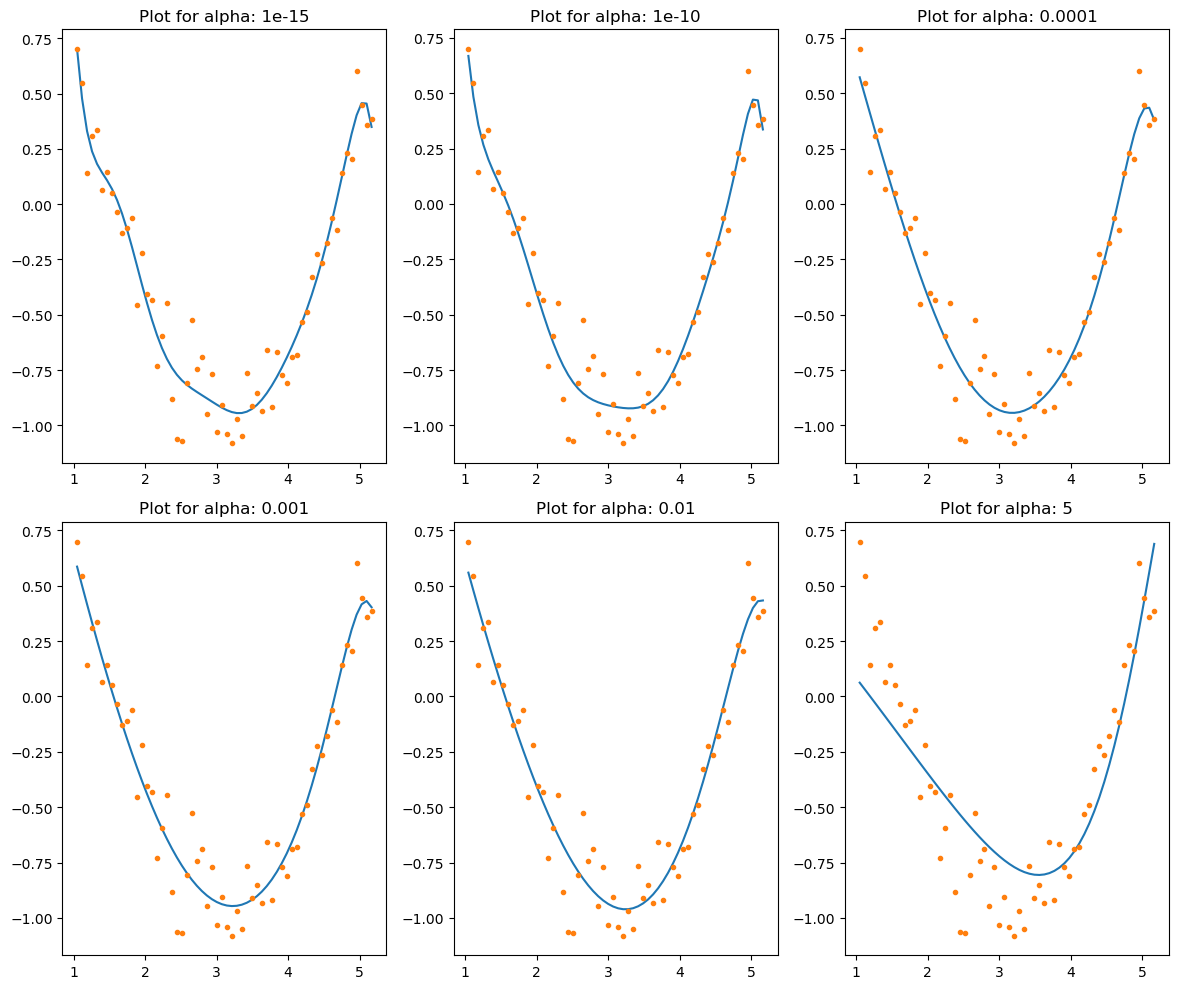

In [18]:
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, 16)])

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# Initialize the dataframe for storing coefficients
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%.2g' % alpha_ridge[i] for i in range(10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# Define which models to plot
models_to_plot = {1e-15: 231, 1e-10: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 5: 236}

# Iterate through the alpha values and store results
for i in range(10):
    coef_matrix_ridge.iloc[i, :] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [22]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,0.038,4.8e+02,-7.3e+03,4.8e+04,-1.8e+05,3.8e+05,-4e+05,3.2e+04,3.9e+05,-2.1e+05,-3.2e+05,3.1e+05,2.3e+05,-4.8e+05,2.7e+05,-5.3e+04
alpha_1e-10,0.89,0.038,-1.5e+02,1.1e+03,-3.4e+03,4.5e+03,-1e+03,-3.1e+03,6.2e+02,2.6e+03,5.6e+02,-1.8e+03,-1.4e+03,8.2e+02,1.4e+03,-8.4e+02,27
alpha_1e-08,0.93,0.038,-26,1.7e+02,-4.3e+02,4e+02,1.3e+02,-3e+02,-2e+02,1.5e+02,2.7e+02,62,-2e+02,-2.2e+02,50,3e+02,-1.6e+02
alpha_0.0001,0.95,0.038,1.2,-2.2,-1.5,0.47,1.1,0.52,-0.35,-0.79,-0.59,0.07,0.87,1.4,1.3,0.12,-2.3
alpha_0.001,0.96,0.038,0.9,-1.5,-1.1,-0.24,0.19,0.25,0.18,0.16,0.23,0.35,0.44,0.42,0.21,-0.23,-0.97
alpha_0.01,0.96,0.038,0.6,-0.89,-1,-0.6,-0.16,0.18,0.38,0.47,0.48,0.42,0.3,0.14,-0.07,-0.32,-0.61
alpha_1,1.6,0.038,-0.18,-0.35,-0.33,-0.23,-0.11,-0.011,0.066,0.11,0.13,0.13,0.11,0.076,0.031,-0.021,-0.08
alpha_5,1.9,0.038,-0.27,-0.26,-0.21,-0.15,-0.092,-0.042,-0.0024,0.026,0.044,0.055,0.06,0.06,0.055,0.048,0.039
alpha_10,2.2,0.038,-0.26,-0.24,-0.19,-0.14,-0.09,-0.049,-0.017,0.0079,0.026,0.039,0.048,0.053,0.056,0.056,0.055
alpha_20,2.8,0.038,-0.24,-0.21,-0.17,-0.12,-0.085,-0.053,-0.026,-0.0045,0.012,0.026,0.036,0.043,0.049,0.053,0.055


In [20]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int32

In [22]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    lassoreg = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=int(1e5)))
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)
    
    rss = sum((y_pred - data['y'])**2)
    intercept = lassoreg.named_steps['lasso'].intercept_
    coef = lassoreg.named_steps['lasso'].coef_
    ret = [rss, intercept]
    ret.extend(coef)
    return ret


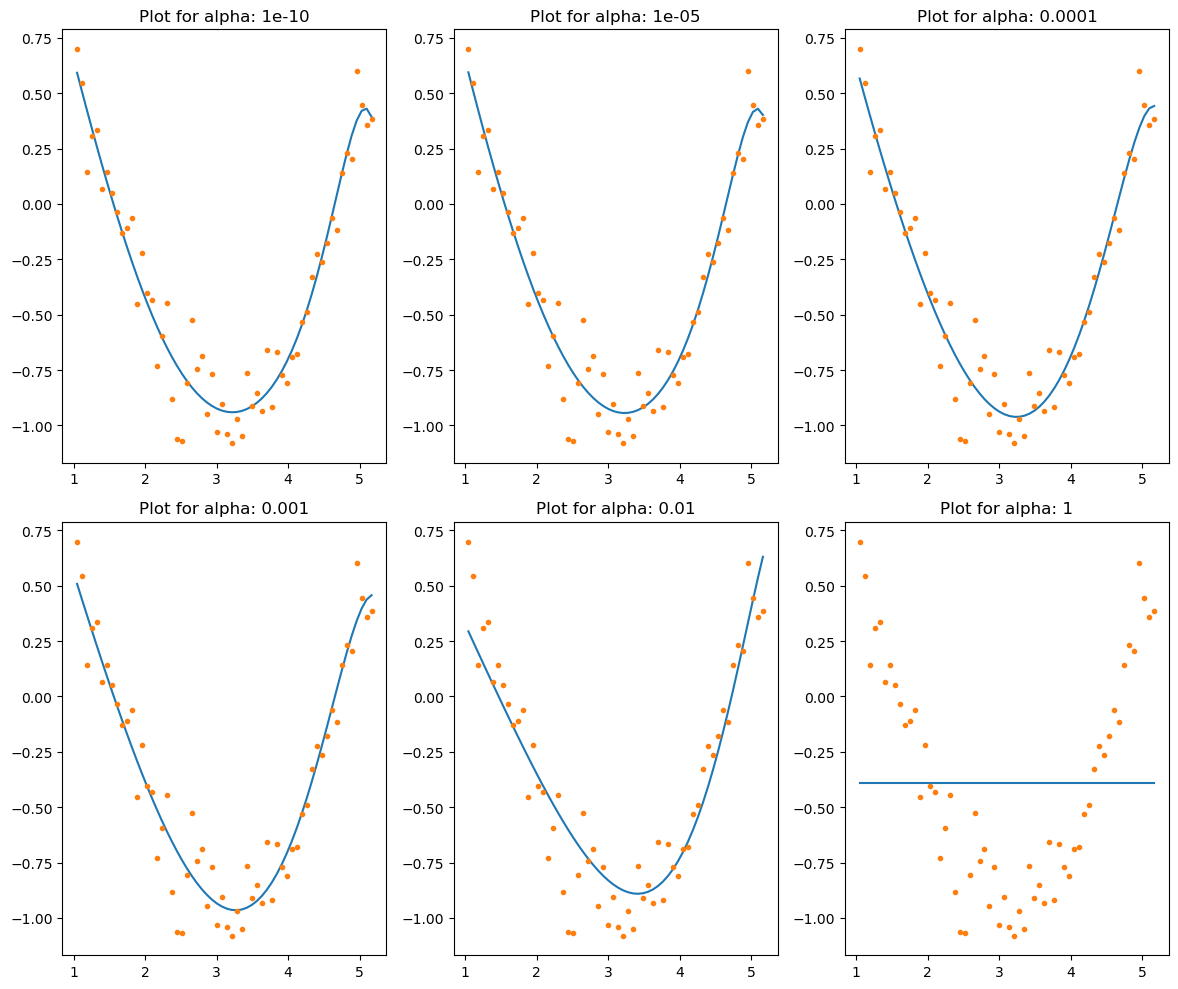

In [24]:
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, 16)])

alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%.2g' % alpha_lasso[i] for i in range(10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-10: 231, 1e-5: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 1: 236}

for i in range(10):
    coef_matrix_lasso.iloc[i, :] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)


In [26]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,-0.39,-1.5,-1,2.7,1.3,-0.5,-1.2,-0.96,-0.28,0.37,0.78,0.87,0.67,0.23,-0.38,-1.1
alpha_1e-10,0.96,-0.39,-1.5,-1,2.7,1.3,-0.5,-1.2,-0.96,-0.28,0.37,0.78,0.87,0.67,0.23,-0.38,-1.1
alpha_1e-08,0.96,-0.39,-1.5,-1,2.7,1.3,-0.5,-1.2,-0.96,-0.28,0.37,0.78,0.87,0.67,0.23,-0.38,-1.1
alpha_1e-05,0.96,-0.39,-1.7,-0.048,2,0.42,0,-0.66,-0.74,-0.023,-0,0.29,1,0.58,0,0,-1.1
alpha_0.0001,0.98,-0.39,-1.6,0.071,1.6,0,0,0,0,0,0,0.26,0.018,0,0,-0,-0.31
alpha_0.001,1,-0.39,-1.3,0,0.26,1.3,0,0,0,0,-0,-0,-0,-0,-0,-0,-0.2
alpha_0.01,1.6,-0.39,-0.86,0,0,0.076,0.97,0,0,0,0,-0,-0,-0,-0,-0,-0.11
alpha_1,15,-0.39,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_5,15,-0.39,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_10,15,-0.39,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      4
alpha_0.0001     9
alpha_0.001     11
alpha_0.01      11
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int32

### 7. Summarize Key Takeaways

***Summary:*** <br/>
L1 Regularization (Lasso): The penalty term is proportional to the absolute value of the coefficients ($\lambda \sum |w_i|$). This results in some coefficients being exactly shrunk to zero, which leads to feature selection by excluding less important features from the model. <br/>
L2 Regularization (Ridge): The penalty term is proportional to the square of the coefficients ($\lambda \sum w_i^2$). This shrinks coefficients towards zero but doesn't set any of them exactly to zero, meaning all features are retained with reduced influence. Ridge is more effective when there are many correlated features.

### 8. Additional Reading Resources:

- https://medium.com/@byanalytixlabs/what-are-lasso-and-ridge-techniques-05c7f6630f6b
- https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261#1d17
- https://www.kdnuggets.com/2018/01/regularization-machine-learning.html
- https://hastie.su.domains/Papers/ESLII.pdf